In [2]:
from sklearn import svm,metrics
from sklearn.neighbors import KNeighborsClassifier # 분류
from sklearn.neighbors import KNeighborsRegressor  # 회귀-예측
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
import requests
import glob, os.path, re

# maplotlib.rcParams['font.family'] = 'AppleGothic Gothic   # Mac 사용자
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = '10'  # 글자크기
matplotlib.rcParams['axes.unicode_minus'] = False

In [3]:
# numpy의 구조로 변환
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0])

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0])


In [5]:
# 그래프 구현

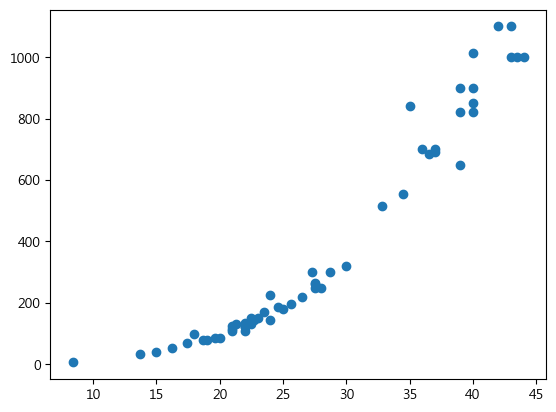

In [7]:
plt.scatter(perch_length, perch_weight)  # 0의 값을 가지는 데이터가 있는지 확인 가능
plt.show()

0의 데이터가 있는지, 직선의 모양이 어떤지를 확인

In [8]:
# 데이터 전처리 - train, test 세트로 구성
# random_state = 42 : 랜덤으로 섞는 것을 고정시켜서, 예측률이 고정됨
train_input,test_input,train_target,test_target = train_test_split(
    perch_length, perch_weight, random_state=42
)

In [9]:
# train_input - 2가지 이상의 행렬로 구성, 2차원 행렬로 구성

In [11]:
# 1차원의 train_input, test_input -> 2차원의 행렬로 변경
# 2개 이상의 특성값을 가지면 2차원 행렬이 되어 reshape을 할 필요가 없음.
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [14]:
# 데이터 훈련 시키기
knr = KNeighborsRegressor()     # knn 회귀 - 예측 알고리즘을 사용
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [16]:
# 데이터 예측하기
predict = knr.predict(test_input)
print("예측 값 : ", predict)

예측 값 :  [  60.    79.6  248.   122.   136.   847.   311.4  183.4  847.   113.
 1010.    60.   248.   248. ]


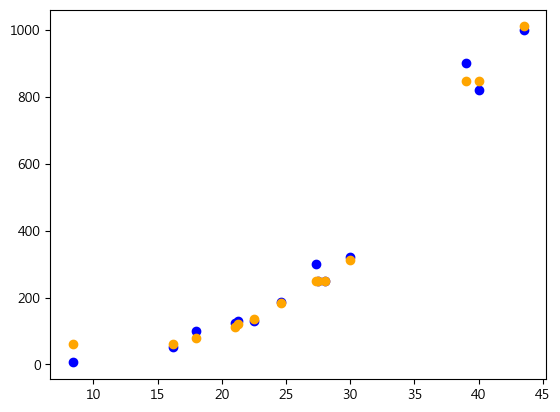

In [22]:
plt.scatter(test_input, test_target, c='blue') # 파란색 : 실제값
plt.scatter(test_input, predict, c='orange')  # 오렌지색 : 예측값

In [29]:
# 예측률 구하기
score = knr.score(train_input,train_target)
print("train 예측률 : ", score)
score2 = knr.score(test_input, test_target)
print("test 예측률 : ", score2)

# 과소적합 판정 : train < test

train 예측률 :  0.9698823289099254
test 예측률 :  0.992809406101064


과소적합 판정에 따른 n_neighbors 조정

In [30]:
knr.n_neighbors = 3   # 기본 5개에서 3개로 줄임
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [32]:
# 조정 후 다시 예측률 구하기
score = knr.score(train_input, train_target)
print("train 예측률 : ", score)
score2 = knr.score(test_input, test_target)
print("test 예측률 : ", score2)

# 정상 : train > test

train 예측률 :  0.9804899950518966
test 예측률 :  0.9746459963987609


In [36]:
predict = knr.predict([[16.8]])
print(predict)  # 길이 입력값에 따른 무게 예측 값

[62.66666667]


In [48]:
# 5부터 5의 배수로 45까지 해서 
# 5,10,15,20,25,30,35,40,45 : 9개의 length_input을 넣어
# 무게를 예측하여 그래프로 출력하시오

# new_length = np.arange(5,45+1,5)
new_length = np.array([5,10,15,20,25,30,35,40,45]).reshape(-1,1)

In [53]:
knr.n_neighbors = 3
knr = KNeighborsRegressor()
knr.fit(train_input, train_target)

predict_n = knr.predict(new_length)
print("예측 무게값 : ", predict_n)

예측 무게값 :  [  60.    60.    60.    95.   193.   311.4  694.2  847.  1010. ]


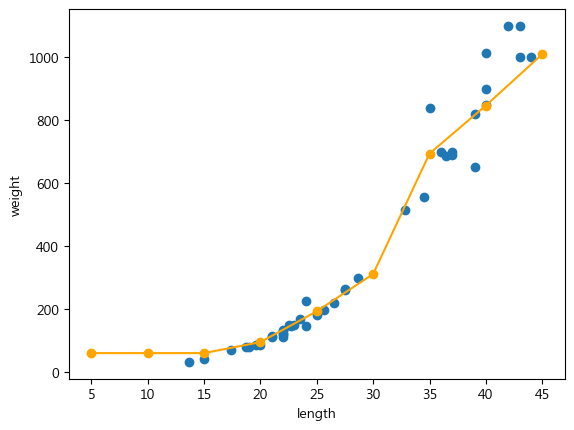

In [54]:
plt.plot(new_length, predict_n, marker='o', c='orange')
plt.scatter(train_input, train_target)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()